In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
train = pd.read_csv('data/click.csv')

In [3]:
train_x = train['x']
train_y = train['y']

독립변수와 종속변수간의 선형식을 찾는방법으로 회귀분석을 사용할 수 있다.
최소제곱법( least squares) 를 사용하여 회귀식을 구할 수 있다.

- 수치적 최적화
    - 최저점이 될때까지 계산을 수행
- 경사하강법 
    - 미분값을 통해 최저점을 찾아간다

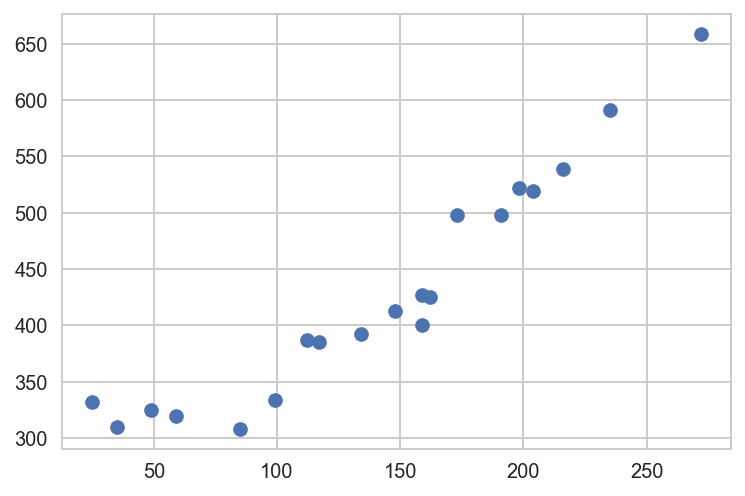

In [4]:
plt.scatter(train_x, train_y)
plt.show()

$$
f_{\theta}(x) = \theta_0 + \theta_1 x \\
E(\theta) = \dfrac{1}{2} \sum^n_{i=1} \left(y^{(i)} - f_{\theta}(x^{(i)}) \right)^2
$$

$$ z^{(i)} = \dfrac{x^{(i)} - \mu}{\sigma} $$
표준화 또는 정규화 전처리를 통해 매개변수 수렴속도를 단축 시킬수 있다

In [5]:
mu = train_x.mean()
sigima = train_x.std()
def standardize(x):

    return (x-mu) / sigima

In [6]:
train_z = standardize(train_x)

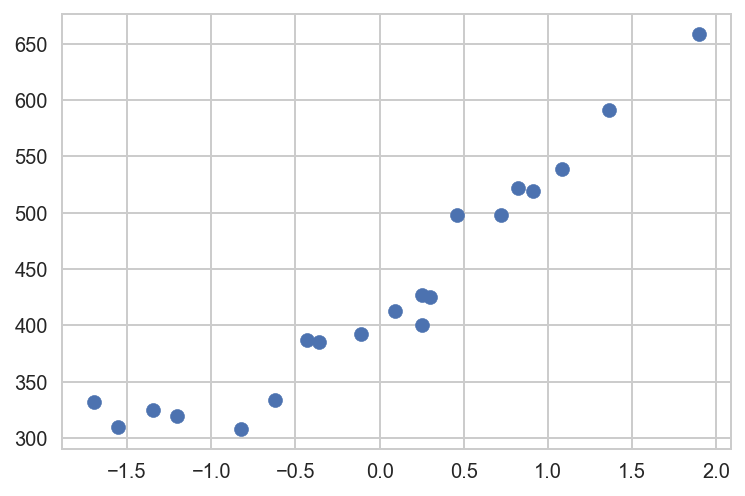

In [7]:
plt.scatter(train_z, train_y)
plt.show()

In [8]:
theta0 = np.random.rand()
theta1 = np.random.rand()

In [9]:
def f(x):
    return theta0 + theta1 * x

def E(x, y):
    return 0.5 * np.sum((y - f(x))**2)

In [10]:
# learning rate
ETA = 0.001

diff = 1

count = 0

error = E(train_z, train_y)
theta0, theta1, error

(0.2905492163985073, 0.23328501429776372, 1935705.9767684925)

In [11]:
res = []
while diff > 0.01:
    tmp0 = theta0 - ETA * np.sum( f(train_z) - train_y )
    tmp1 = theta1 - ETA * np.sum( (f(train_z) - train_y) * train_z )
    
    theta0 = tmp0
    theta1 = tmp1
    
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    
    count += 1
    #log = '%d : t0:%f, t1:%f, diff:%f, error:%f'%(count, theta0, theta1, diff, error)
    #print(log)
    res.append([theta0, theta1, diff, error])

res = pd.DataFrame(res, columns=['theta0','theta1','diff','error'])

In [12]:
res

,theta0,theta1,diff,error
0,8.867738,2.051089,76105.510027,1.859600e+06
1,17.273383,3.834355,73098.150223,1.786502e+06
2,25.510916,5.583739,70209.640285,1.716293e+06
3,33.583697,7.299885,67435.282852,1.648857e+06
4,41.495024,8.983424,64770.566234,1.584087e+06
5,49.248123,10.634975,62211.157078,1.521876e+06
6,56.846161,12.255147,59752.893312,1.462123e+06
7,64.292237,13.844536,57391.777377,1.404731e+06
8,71.589393,15.403727,55123.969726,1.349607e+06
9,78.740605,16.933292,52945.782573,1.296661e+06


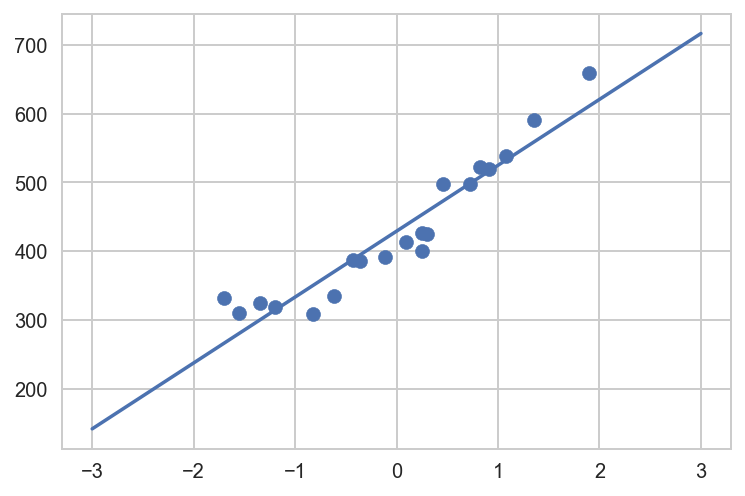

In [13]:
xx = np.linspace(-3, 3, 100)
plt.scatter(train_z, train_y)
plt.plot(xx, f(xx))
plt.show()

# 다항회귀

In [14]:
def f(x):
    return np.dot(x, theta)

In [15]:
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x**2]).T

In [16]:
X = to_matrix(train_z)

In [17]:
theta = np.random.rand(3)

In [18]:
diff = 1

error = E(X, train_y)
error

1928992.5552474344

In [19]:
res = []
while diff > 0.01:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

    res.append([theta, diff, error])

In [20]:
pd.DataFrame(res)

,0,1,2
0,"[9.42716538747445, 2.1439272139071304, 8.71211...",145680.829625,1.783312e+06
1,"[17.656091852680007, 3.9366195702111586, 16.73...",132150.099814,1.651162e+06
2,"[25.56792754738885, 5.70556103870787, 24.29636...",119941.482067,1.531220e+06
3,"[33.17793804631116, 7.4505996144234565, 31.408...",108924.189234,1.422296e+06
4,"[40.50061883530616, 9.171617600767165, 38.0985...",98980.415994,1.323316e+06
5,"[47.549734503047596, 10.868529349407014, 44.38...",90004.048908,1.233311e+06
6,"[54.33835593458472, 12.541279125176091, 50.299...",81899.504702,1.151412e+06
7,"[60.87889560871018, 14.189839089445924, 55.851...",74580.684027,1.076831e+06
8,"[67.1831410958475, 15.81420739574173, 61.06270...",67970.029202,1.008861e+06
9,"[73.2622868482377, 17.41440639169542, 65.95140...",61997.675631,9.468636e+05


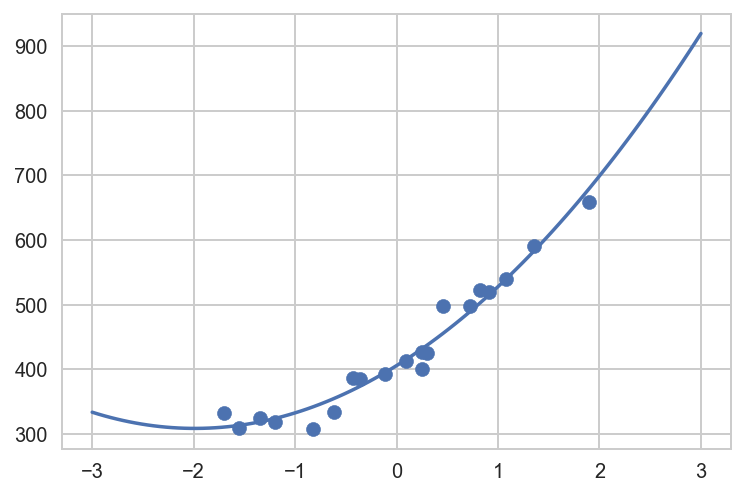

In [21]:
xx = np.linspace(-3, 3, 100)
plt.scatter(train_z, train_y)
plt.plot(xx, f(to_matrix(xx)))

In [50]:
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x))**2)

In [51]:
theta = np.random.rand(3)

erros = []

diff = 1

erros.append(MSE(X, train_y))

In [52]:
res = []
while diff > 0.01:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    erros.append(MSE(X, train_y))
    diff = erros[-2] - erros[-1]    
    res.append([theta, diff])

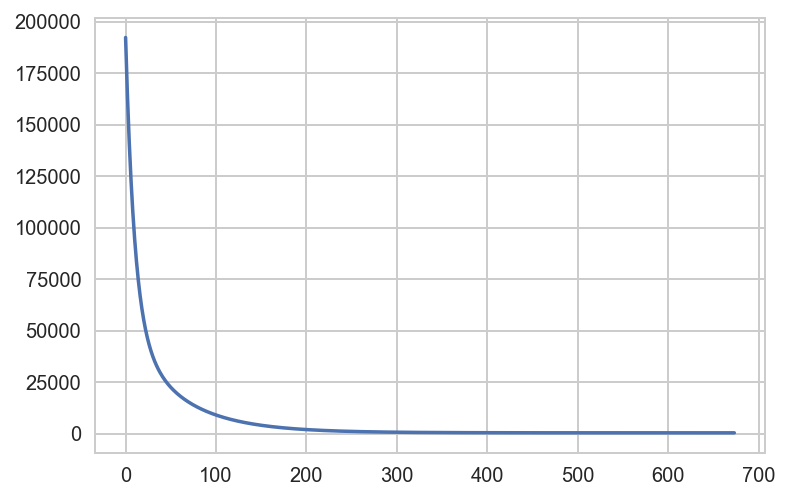

In [53]:
plt.plot(np.arange(len(erros)), erros)
plt.show()

In [56]:
rdf = pd.DataFrame(res)

In [59]:
t_ls = np.vstack(rdf[0].values)

In [64]:
len(t_ls)

673

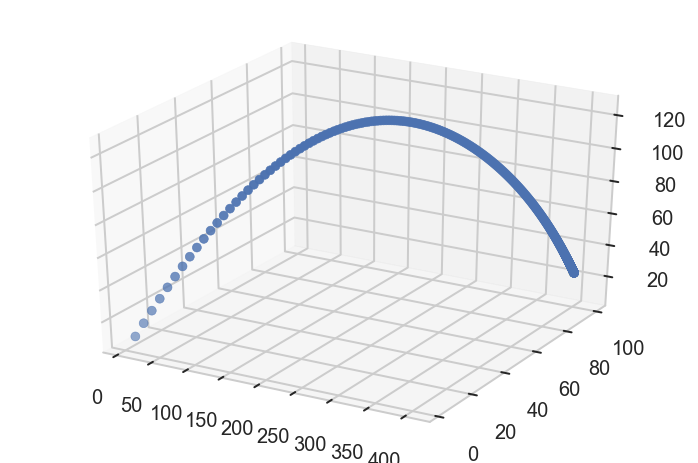

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t_ls[:,0], t_ls[:,1], t_ls[:, 2])

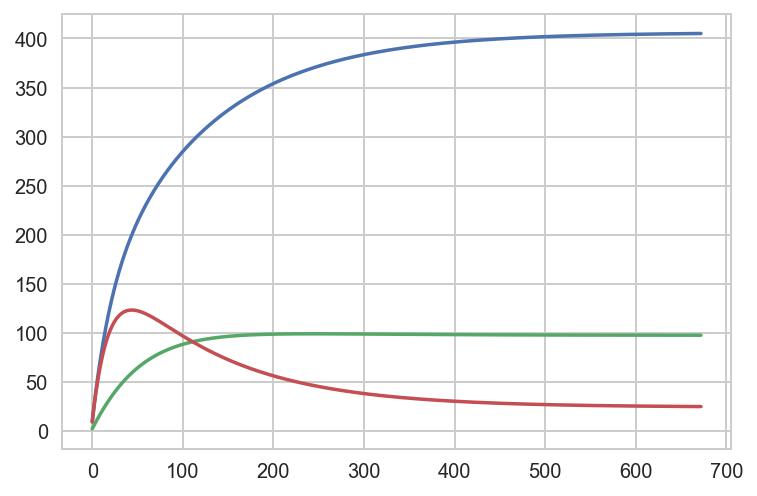

In [62]:
plt.plot(t_ls[:,0])
plt.plot(t_ls[:,1])
plt.plot(t_ls[:,2])

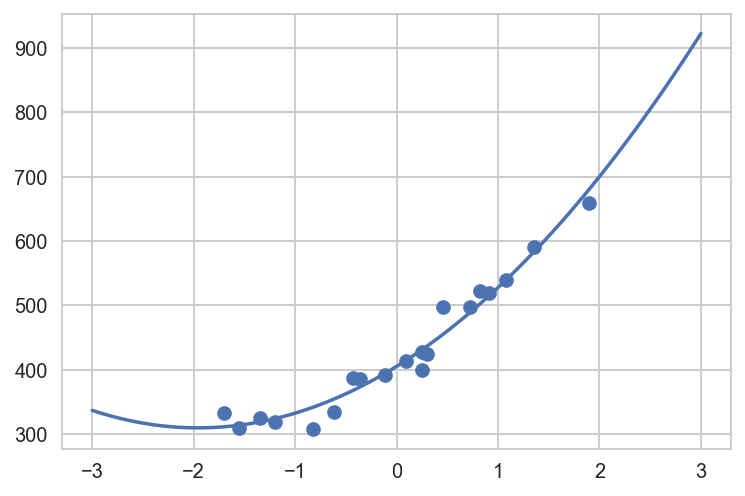

In [26]:
xx = np.linspace(-3, 3, 100)
plt.scatter(train_z, train_y)
plt.plot(xx, f(to_matrix(xx)))
plt.show()

In [49]:
res[

[array([9.29707957, 2.13567392, 9.27764778]), 14519.48409831227]

In [27]:
theta = np.random.rand(3)

erros = []

diff = 1

erros.append(MSE(X, train_y))

In [28]:
ts = []
while diff > 0.01:
    p = np.random.permutation(X.shape[0])
    for x, y in zip(X[p,:], train_y[p]):        
        theta = theta - ETA * (f(x) - y) * x
        ts.append(theta)
    
    erros.append(MSE(X, train_y))
    diff = erros[-2] - erros[-1]  

In [29]:
len(erros)

674

In [63]:
len(ts)

13460

In [30]:
ts = np.vstack(ts)

In [31]:
ts

array([[  0.88703604,   1.13684761,   0.55626645],
       [  1.28582552,   1.23781352,   0.5818291 ],
       [  1.60418693,   0.85518062,   1.04170874],
       ...,
       [405.05016418,  97.61138167,  24.93385941],
       [405.04880782,  97.61125536,  24.93384765],
       [405.01744742,  97.6033155 ,  24.93183743]])

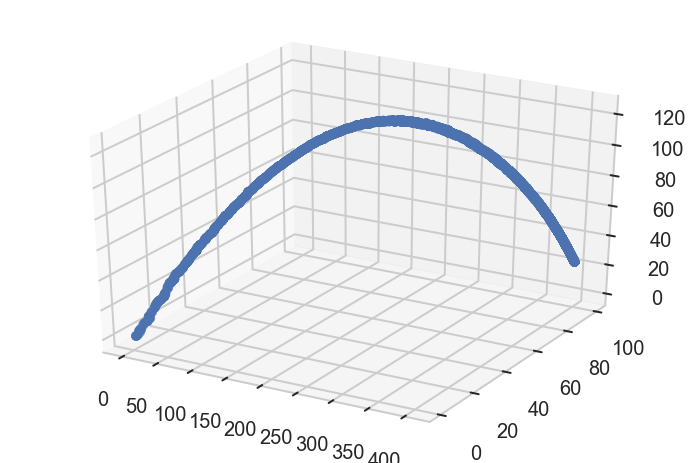

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ts[:,0], ts[:,1], ts[:, 2])

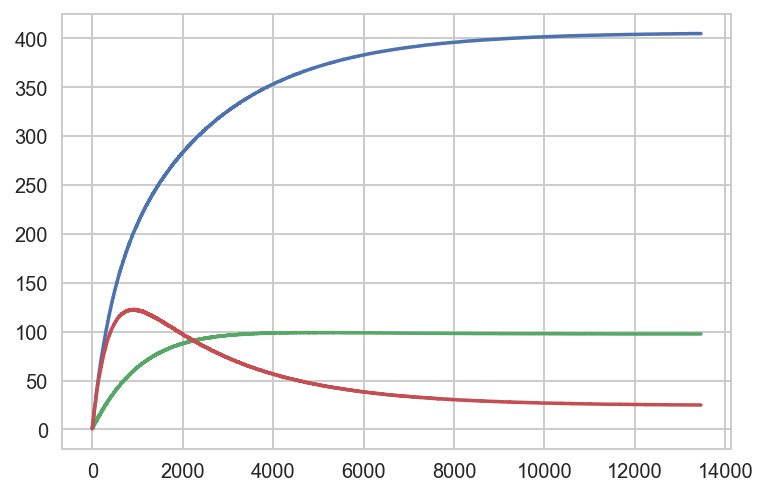

In [46]:
plt.plot(ts[:,0])
plt.plot(ts[:,1])
plt.plot(ts[:,2])

In [99]:
from sklearn.datasets.samples_generator import make_regression 
from scipy import stats 
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()

In [103]:
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y)
slope, intercept

(82.90456141637905, -3.7092288686703028)

In [104]:
#best_fit = np.vectorize(lambda x: x * slope + intercept)
def best_fit(x):
    return intercept + slope * x

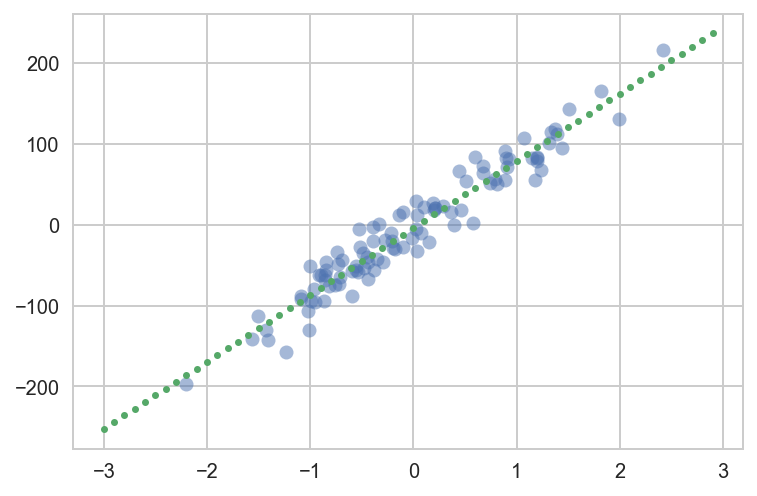

In [107]:
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')
plt.show()

In [108]:
n_epochs = 20
for i in range(n_epochs):
    params_grad = evaluate_gradient(loss_function, data, params)
    params = params - learning_rate * params_grad

NameError: name 'evaluate_gradient' is not defined

In [125]:
def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    history = [] # to store all thetas
    preds = []
    
    
    m = y.size # number of data points
    theta = theta_init
  
    # 초기 잔차 구하기
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m) # mse   
    

    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    
    
    counter = 0
    oldcost = 0
    counter+=1
    while abs(currentcost - oldcost) > precision: # error가 0.001보다 작을때까지
        oldcost = currentcost
        gradient = x.T.dot(error) / m 
        
        theta = theta - step * gradient  # update
        history.append(theta)
        
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: 
            preds.append(pred)
            
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

In [126]:
xaug = np.c_[np.ones(x.shape[0]), x] # 오그멘티에션
theta_i = [-15, 40] + np.random.rand(2) # 초기 세타값 설정
theta_i

array([-14.65691608,  40.58557624])

In [127]:
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)


Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


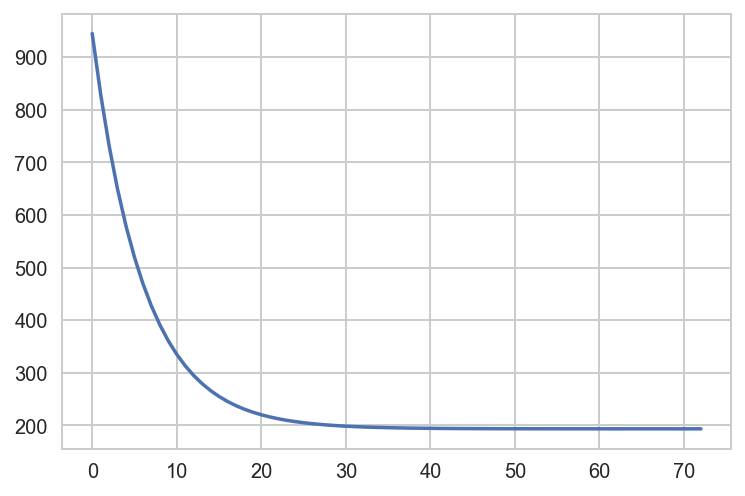

In [122]:
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))
plt.plot(range(len(cost)), cost);

In [131]:
import warnings
warnings.filterwarnings('ignore')

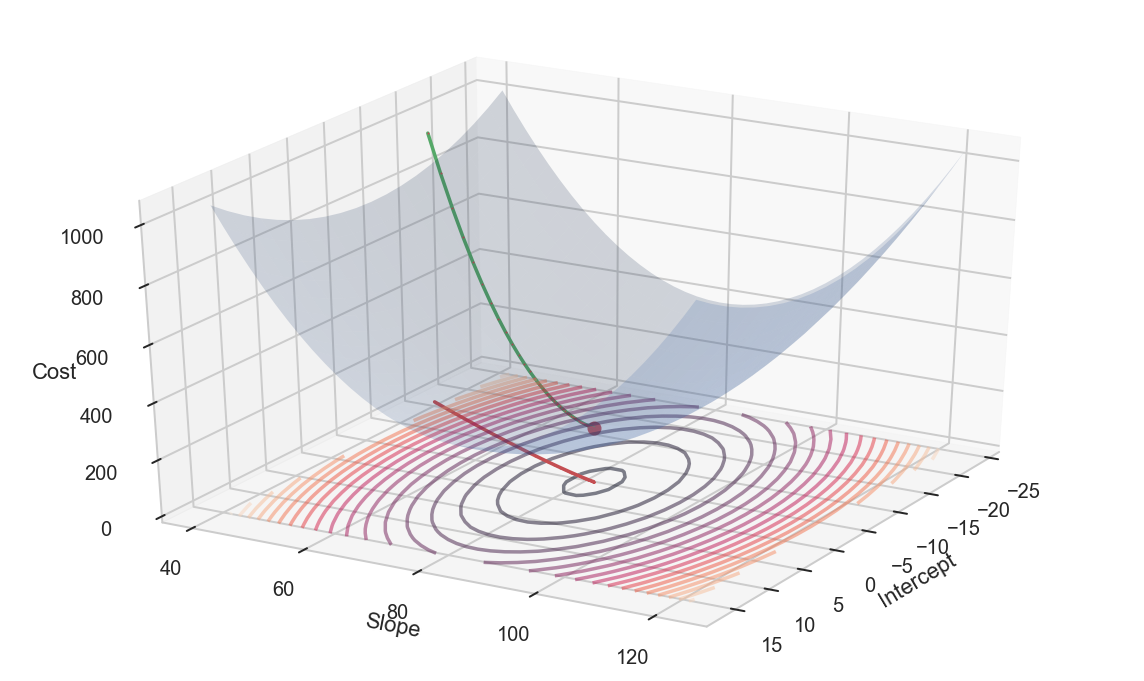

In [137]:
def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)



fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
#ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);

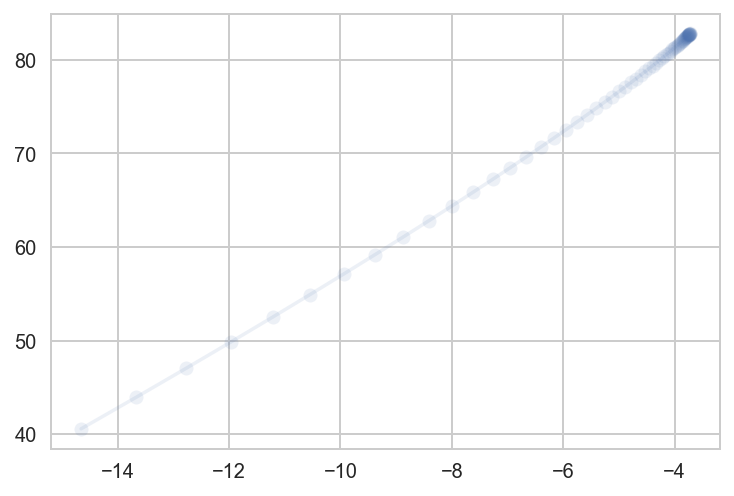

In [146]:
plt.plot([t[0] for t in history], [t[1] for t in history],'o-', alpha=0.1)

In [141]:
def sgd(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    history = [] # to store all thetas
    preds = []
    grads=[]
    
    theta = theta_init
    m = y.size # number of data points
    
    oldtheta = 0
    counter = 0
    oldcost = 0
    epoch = 0
    
    i = 0 #index
    pred = np.dot(x[i,:], theta)
    error = pred - y[i]
    gradient = x[i,:].T * error
    grads.append(gradient)
    print(gradient,x[i],y[i],pred, error, np.sum(error ** 2) / 2)
    currentcost = np.sum(error ** 2) / 2
    
    
    counter+=1
    preds.append(pred)
    costsum = currentcost
    costs.append(costsum/counter)
    history.append(theta)
    
    
    print("start",counter, costs, oldcost)
    while 1:
        #while abs(costs[counter-1] - oldcost) > precision:
        #while np.linalg.norm(theta - oldtheta) > precision:
        #print("hi", precision)
        #oldcost=currentcost
        
        # 전체 오차를 구해서 하는게 아니라 
        # 각 포인트에 대해서 하나씩 세타 조정
        gradient = x[i,:].T*error
        grads.append(gradient)
        oldtheta = theta
        theta = theta - step * gradient  # update
        history.append(theta)
        
        i += 1
        if i == m:#reached one past the end.
            #break
            epoch +=1
            neworder = np.random.permutation(m)
            x = x[neworder]
            y = y[neworder]
            i = 0
            
        pred = np.dot(x[i,:], theta)
        error = pred - y[i]
        currentcost = np.sum(error ** 2) / 2
        
        #print("e/cc",error, currentcost)
        if counter % 25 == 0: 
            preds.append(pred)
            
        counter+=1
        costsum += currentcost
        oldcost = costs[counter-2]
        costs.append(costsum/counter)
        #print(counter, costs, oldcost)
        if maxsteps:
            #print("in maxsteps")
            if counter == maxsteps:
                break
        
    return history, costs, preds, grads, counter, epoch

In [142]:
history2, cost2, preds2, grads2, iters2, epoch2 = sgd(xaug, y, theta_i, maxsteps=5000, step=0.01)
print(iters2, history2[-1], epoch2, grads2[-1]) 

[-24.88274405  -0.80255377] [1.         0.03225343] 11.534851890155354 -13.347892158033018 -24.88274404818837 309.5754756838269
start 1 [309.5754756838269] 0
5000 [-3.35983589 82.76047688] 49 [30.35110483 11.98145159]


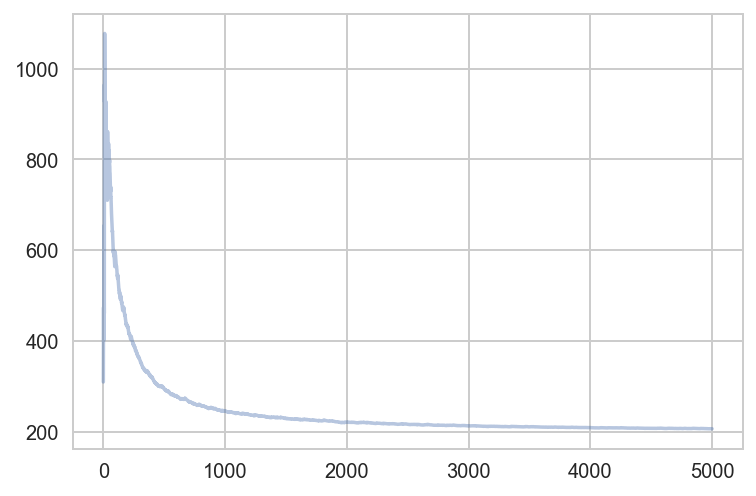

In [143]:
plt.plot(range(len(cost2[-10000:])), cost2[-10000:], alpha=0.4);

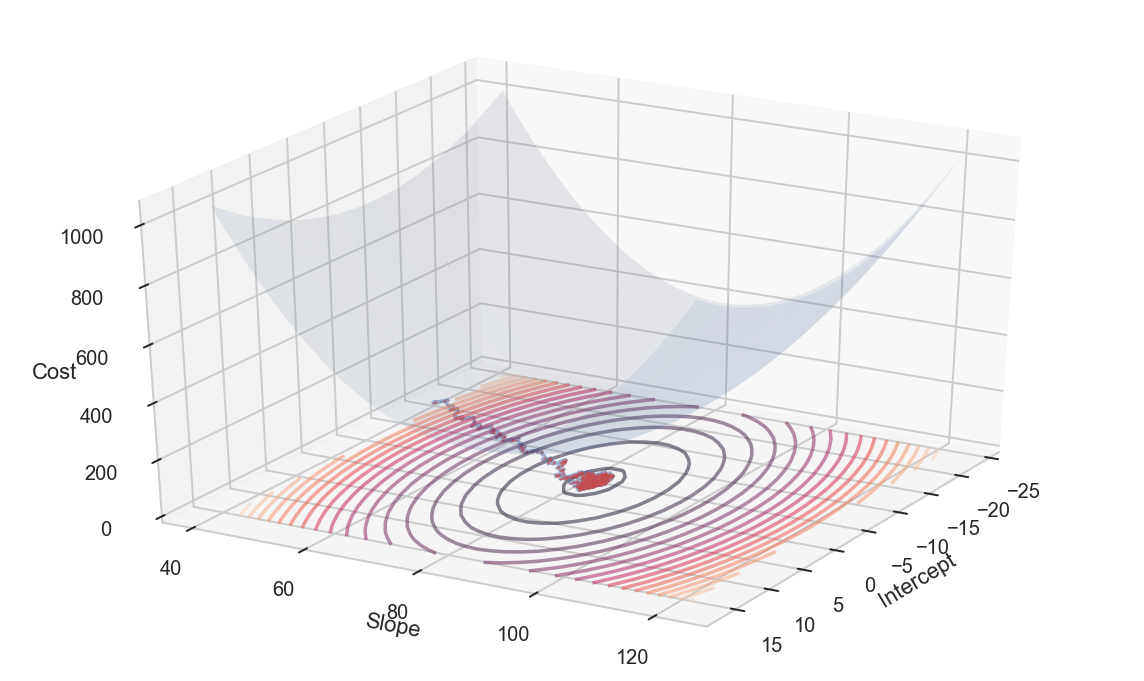

In [144]:
def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.1)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev=30., azim=30)
#ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
#ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);


#ax.plot([t[0] for t in history2], [t[1] for t in history2], cost2 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);
ax.plot([t[0] for t in history2], [t[1] for t in history2], 0 , alpha=0.5, markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);


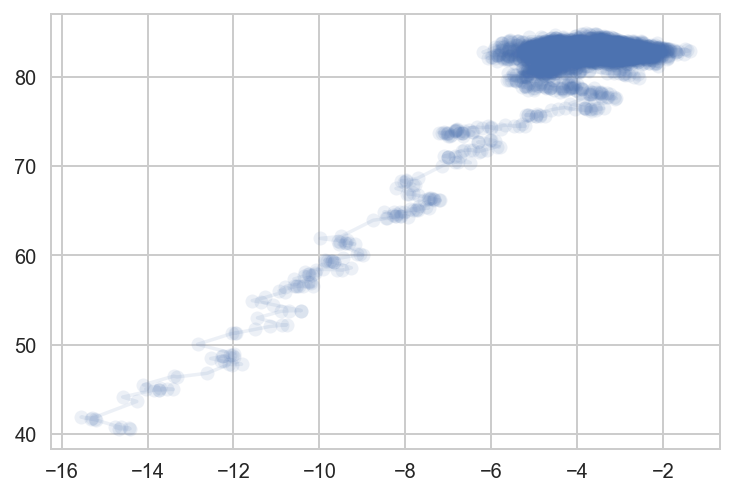

In [145]:
plt.plot([t[0] for t in history2], [t[1] for t in history2],'o-', alpha=0.1)